# Homework 5: Analyzing a SQLite Sample Database with Pandas
**Objective:**

The objective of this assignment is to practice using Jupyter Notebook, Pandas DataFrames, and SQLite for data analysis. You will use the SQLite sample database provided to perform various data analysis tasks.

**Instructions:** 
1. Download the chinook.db database from Canvas [or here](https://www.sqlitetutorial.net/sqlite-sample-database/) and upload it into your Jupyter Notebook instance.

2. Review the schema diagram of the Chinook Database found [here](https://www.sqlitetutorial.net/sqlite-sample-database/). Familiarize yourself with the names of the tables, and the columns that they contain.

3. Complete the following code cells in this Jupyter Notebook. Provide explanations in the markdown cells and comments for your code as necessary.

## Task 1: Connect to the SQLite Database
* Import the necessary libraries at the beginning of your notebook
* Establish a connection to the `chinook.db` database.


In [17]:
import pandas as pd
import sqlite3

#Connect to the SQLite database here
conn = sqlite3.connect('chinook.db')


## Task 2: Data Analysis - Customer Insights
1. Write a SQL query to find the customers who have made purchases at Chinook. Return their CustomerId, FirstName, LastName, and TotalSpent.
2. Return the results of this query to a Pandas DataFrame. Print the contents of the Dataframe
3. Find the top 5 customers who have spent the most money. (you can do this in Pandas, or in SQL. Whichever you'd prefer)

In [19]:
#Your SQL Query here
#Hint: you'll want to INNER JOIN Invoices & Invoice Items and SUM UnitPrice * Quantity AS TotalSpent, then GROUP BY the correct criteria

# Execute the query and load the data into a Pandas DataFrame

query = '''
    SELECT 
        c.CustomerId, 
        c.FirstName, 
        c.LastName, 
        SUM(ii.UnitPrice * ii.Quantity) AS TotalSpent
    FROM 
        customers c
    INNER JOIN 
        invoices i ON c.CustomerId = i.CustomerId
    INNER JOIN 
        invoice_items ii ON i.InvoiceId = ii.InvoiceId
    GROUP BY 
        c.CustomerId, 
        c.FirstName, 
        c.LastName
    ORDER BY 
        TotalSpent DESC;
'''
df = pd.read_sql_query(query, conn)

#Print the Pandas Dataframe from the reuslt of the query
print(df)


    CustomerId  FirstName      LastName  TotalSpent
0            6     Helena          Holý       49.62
1           26    Richard    Cunningham       47.62
2           57       Luis         Rojas       46.62
3           45   Ladislav        Kovács       45.62
4           46       Hugh      O'Reilly       45.62
5           24      Frank       Ralston       43.62
6           28      Julia       Barnett       43.62
7           37       Fynn    Zimmermann       43.62
8            7     Astrid        Gruber       42.62
9           25     Victor       Stevens       42.62
10          44      Terhi    Hämäläinen       41.62
11           5  František   Wichterlová       40.62
12          43   Isabelle       Mercier       40.62
13          48   Johannes  Van der Berg       40.62
14           1       Luís     Gonçalves       39.62
15           3   François      Tremblay       39.62
16           4      Bjørn        Hansen       39.62
17          17       Jack         Smith       39.62
18          

In [20]:
# Display the top 5 customers
top_5_customers = df.head(5)
print(top_5_customers)

   CustomerId FirstName    LastName  TotalSpent
0           6    Helena        Holý       49.62
1          26   Richard  Cunningham       47.62
2          57      Luis       Rojas       46.62
3          45  Ladislav      Kovács       45.62
4          46      Hugh    O'Reilly       45.62


## Task 3: Visualization
1. Using Matplotlib and Seaborn, Plot the total amount spent by the top 5 customers using a bar chart. Display the Customer's First Name on the Y-Axis, and the Total Amount Spent on the X-Axis

C:\Users\ERock\AppData\Local\Temp\ipykernel_11700\2680771642.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_customers, x='TotalSpent', y='FirstName', palette='inferno')


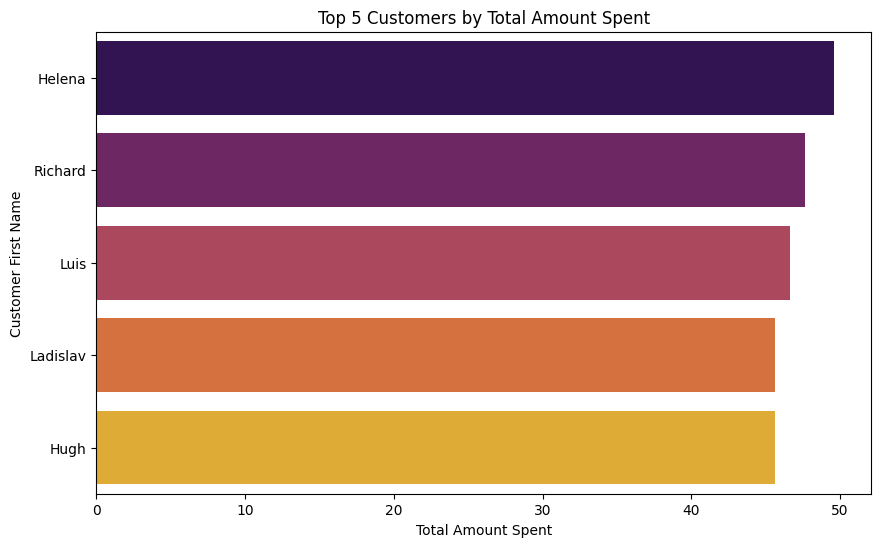

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_customers, x='TotalSpent', y='FirstName', palette='inferno')
plt.xlabel('Total Amount Spent')
plt.ylabel('Customer First Name')
plt.title('Top 5 Customers by Total Amount Spent')
plt.show()

## Congrats! You've reached the end of Homework 5!
Please turn in your notebook to Canvas to receive credit. 